## 기술통계
- 기초통계를 이용해서 자료의 성질(특성)을 확인(설명)하는 것
- 자료의 요약된 정보
  - 자료의 자세한 정보까지는 확인할 수 없습니다
   - 자료의 세세한 정보까지 확인이 가능하면, 통계없이 확인 가능한 정도의 아주 작은 파일
   - 즉, 빅데이터에서 아주아주 큰 파일에 대해서 확인할 수 있는 방법은 통계외에는 접근하는 방법조차 없습니다
   - 자료의 아주 세세나 정보는 통계에 있어서는 큰 관심사가 되지 않습니다

- 자료의 커다란 특성을 확인할 수 있습니다
- 통계가 아니고는 대용량의 자료를 설명할 방법이 없습니다

- 통계적 수치(통계량)
  - 중심에 대한 통계
  - 산포에 대한 통계
  - 관계에 대한 통계
  - 형태에 대한 통계

## 중심에 대한 통계
- 자료의 중심에 대한 경향을 나타내는 수치
- 평균 : 자료에 대한 평균(모평균/표본평균/샘플평균)
- 중앙값 : 자료의 50%에 해당하는 값
  - 자료를 정렬했을 때, 가운데 오는 값
- 최빈값 : 가장 많이 등장하는 값

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/BAUM/Desktop/multicampus/TIL/기본강의/누구나파이썬통계분석/data/python_stat_sample-master/data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   student number  50 non-null     int64
 1   english         50 non-null     int64
 2   mathematics     50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [4]:
# 학생 10명의 영어점수
scores = np.array(df['english'][:10])
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
sum(scores) / len(scores)

55.0

In [6]:
np.mean(scores)

55.0

In [7]:
df['english'][:10].mean()

55.0

In [8]:
sort_scores = np.sort(scores)
sort_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [9]:
size = len(sort_scores)

In [10]:
size

10

In [11]:
if size % 2 == 0:
    pass
else:
    mid = sort_scores[size//2 -1]

In [12]:
scores2 = np.array(df['english'][:11])


In [13]:
scores2[len(scores2)//2]

48

In [14]:
scores2

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70], dtype=int64)

In [15]:
np.sort(scores2)

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69, 70], dtype=int64)

In [16]:
np.median(scores2)

57.0

In [17]:
np.sort(scores)

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [18]:
np.median(scores)

56.5

## 최빈값 구하기

In [19]:
pd.Series(scores).mode()

0    65
dtype: int64

In [20]:
df['english'][:10].mode()

0    65
dtype: int64

## 산포에 대한 통계
- 자료의 변동성을 나타내는 수치
- 자료들이 중심으로부터 얼마나 멀리 떨어져 있는가
- 편차 : 수집된 값과 평균의 차이 (평균으로부터 얼마나 떨어져 있는가)
- 변동 : 편차의 제곱합
- 분산 : 변동을 데이터의 개수로 나눈 값
- 표준편차 : 분산의 제곱근

## 편차 구하기

In [21]:
mean = np.mean(scores)

deviation = mean - scores
deviation

array([ 13., -14.,  -1.,  14.,  -2.,   7., -10.,   6., -10.,  -3.])

## 변동 구하기

In [22]:
variation = np.sum(deviation ** 2)
variation

860.0

## 분산 구하기

In [23]:
variance = variation / len(scores)
variance

86.0

In [24]:
np.var(scores)

86.0

In [25]:
np.var(scores, ddof=1)

95.55555555555556

In [26]:
variation / (len(scores) - 1)

95.55555555555556

In [27]:
(df['english'][:10]).var()

95.55555555555556

In [28]:
df['english'][:10].var(ddof=0)

86.0

## 표준편차 구하기

In [29]:
import math
standartdeviation = math.sqrt(variance)
standartdeviation

9.273618495495704

In [32]:
df['english'][:10].describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
Name: english, dtype: float64

In [30]:
z = (scores - mean) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [33]:
np.mean(z), np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

## 편차값
- 평균이 50, 표준편차가 10이 되도록 정규화
- 편차값이 50이면 평균적인 결과
- 50보다 클 수록 상위 결과라는 의미로 해석

In [34]:
z = 50 + 10 * (scores - mean) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

### 관계에 대한 통계
- 자료와 자료간의 관계를 나타내는 수치
- 수치일 뿐, 실제 관계를 수치만 가지고 정확하게 표현할 수 없다
- 수치를 가지고 해석하는 것은 분석하는 사람의 몫

1. 상관관계
   - 공분산
   - 두 변수 사이의 분산
   - 결과적으로 두 변수의 분산이 같이 커지거나, 같이 작아지면 상관성이 있다라고 해석

2. 인과관계
   - 추론통계에서 확인하고자 하는 것이 인과성이 될 수 있습니다
   - 어떤 자료가 다른 자료의 원인이 되는 경우
   - 모든 변수가 무조건 원인이 될 수 있는 것은 아닙니다

In [46]:
# 영어점수가 수학점수의 공분산
en_scores = np.array(df['english'])
ma_scores = np.array(df['mathematics'])

In [37]:
cov = np.cov(en_scores, ma_scores, ddof=0)
cov

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [38]:
np.corrcoef(en_scores, ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [39]:
df.corr()

,student number,english,mathematics
student number,1.000000,0.071501,0.289502
english,0.071501,1.000000,0.723741
mathematics,0.289502,0.723741,1.000000


## 두 변수의 상관성을 확인하기 좋은 시각화 pair_plot 을 이용해 볼 수 있습니다

In [41]:
import seaborn

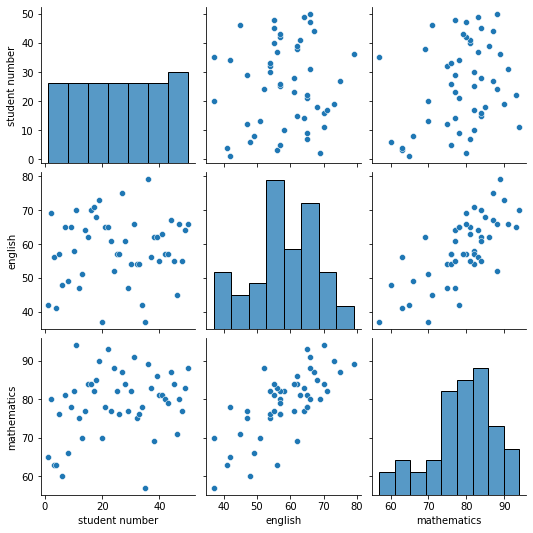

In [42]:
seaborn.pairplot(df)

In [47]:
score_df = pd.DataFrame({
    'english':en_scores,
    'math':ma_scores
})

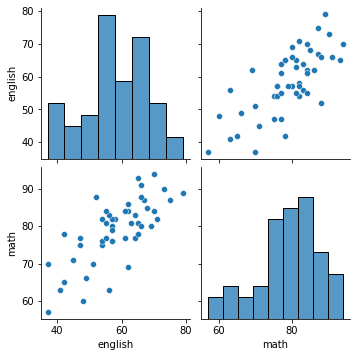

In [48]:
seaborn.pairplot(score_df)

## 형태에 대한 통계
- 자료의 분포나 왜곡된 형태
- 왜도 : 편향, 중심을 기준으로 좌우의 데이터가 편향되어 있는 형태를 나타내는 수치
- 점도 : 뾰족함의 정도

## 추론통계
- 통계가 모집단의 모든 특징을 전부 설명할 수는 없다
- 표본의 특성이 꼭 모집단과 같을거라는 보장이 없다
- 표본을 통해서 모집단의 평균을 알 수 없지만 추론은 가능하다
- 모집단은 시간이 지나면서 변하기 때문에 표본이 모집단을 완벽히 설명하는 것은 불가능
- ML/DL 에서 하려는 것은 과거의 데이터를 이용해 현재나 미래를 설명하려는 것
- 앞으로 수업시간에 얘기하는 확률 및 통계는 모집단을 가정하고 진행
- 통계가 아니고서는 대규모의 데이터를 해석할 수도 없고, 설명할 수도 없음
- 통계는 항상 거짓말로부터 출발한다는 사실을 인지하고 스스로 입증해야 함

## 모집단과 표본

In [50]:
df = pd.read_csv('C:/Users/BAUM/Desktop/multicampus/TIL/기본강의/누구나파이썬통계분석/data/python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [51]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i}번째 평균 {sample.mean()}')

0번째 평균 67.5
1번째 평균 72.85
2번째 평균 72.45
3번째 평균 71.55
4번째 평균 72.05


In [52]:
scores.mean()

69.53